# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


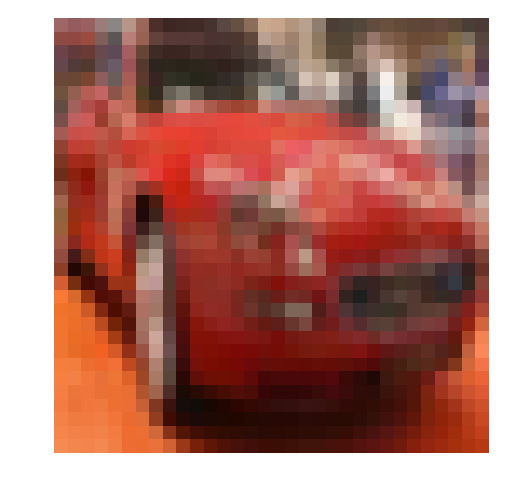

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    normalized_x = x / 255.0
    return normalized_x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # IDK why the method is called 2 times in the test
    # 1 with a list, other with a nd-array
    
    qtd = 168
    if type(x) == np.ndarray:
        qtd=x.shape[0]
    else:
        qtd=len(x)
    
    # The actual function is here
    hot_x = np.zeros((qtd, 10))
    for i, label in enumerate(x):
        x_label = np.zeros(10)
        x_label[label] = 1
        hot_x[i] = x_label
    return hot_x
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    return tf.placeholder(tf.float32, 
                          shape=[None, image_shape[0], image_shape[1], image_shape[2]], 
                          name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    x_shape = [x for x in filter(lambda x: x != None, x_tensor.get_shape().as_list())]
    shape = list(conv_ksize) + [x_shape[2], conv_num_outputs]
    
    c_strides = [1, conv_strides[0], conv_strides[1], 1]
    p_strides = [1, pool_strides[0], pool_strides[1], 1]
    p_ksize = [1, pool_ksize[0], pool_ksize[1], 1]
    
    W_conv = weight_variable(shape)
    b_conv = bias_variable([conv_num_outputs])
    conv_op = tf.nn.conv2d(x_tensor, W_conv, strides=c_strides, padding='SAME')
    # Add bias
    conv_op = tf.nn.bias_add(conv_op, b_conv)
    h_conv = tf.nn.relu(conv_op)
    
    return tf.nn.max_pool(h_conv, ksize=p_ksize, strides=p_strides, padding='SAME')

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # Seems this solution is not working
    #flat_shape = np.prod(np.array(x_tensor.shape[1:]))
    #dim = tf.reduce_prod(tf.shape(x_tensor)[1:])
    #flat = tf.reshape(x_tensor, [-1, dim])
    #return flat
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=None)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [39]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv1 = conv2d_maxpool(x, 32, (3, 3), (2, 2), (4, 4), (2, 2))
    conv2 = conv2d_maxpool(conv1, 64, (3, 3), (2, 2), (2, 2), (2, 2))
    conv3 = conv2d_maxpool(conv2, 128, (3, 3), (2, 2), (2, 2), (2, 2))
    
    flattened = flatten(conv3)
    
    # Dropout
    # Course review
    fc1 = fully_conn(flattened, 128)
    dropout1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = fully_conn(fc1, 64)
    dropout2 = tf.nn.dropout(fc2, keep_prob)
    fc3 = fully_conn(fc2, 32)
    fc4 = fully_conn(fc3, 16)
    
    y = output(fc4, 10)
    
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [40]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    return session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [41]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    c = session.run(cost, feed_dict={x: feature_batch, y: label_batch })
    acc = session.run(accuracy, feed_dict={x: feature_batch, y: label_batch })
    
    c1 = session.run(cost, feed_dict={x: valid_features, y: valid_labels })
    acc1 = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels })
    
    # Course Review
    # Use the global variables valid_features and valid_labels to calculate validation accuracy.
    print('training cost %g' % c, " validation cost %g" % c1)
    print('training accuracy %g' % acc, " validation accuracy %g" % acc1)
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [42]:
# TODO: Tune Parameters
epochs = 300
batch_size = 32
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  training cost 2.14491  validation cost 1.97686
training accuracy 0.25  validation accuracy 0.2472
Epoch  2, CIFAR-10 Batch 1:  training cost 2.01564  validation cost 1.8641
training accuracy 0.25  validation accuracy 0.3034
Epoch  3, CIFAR-10 Batch 1:  training cost 1.66777  validation cost 1.72509
training accuracy 0.375  validation accuracy 0.3612
Epoch  4, CIFAR-10 Batch 1:  training cost 1.63736  validation cost 1.70017
training accuracy 0.5  validation accuracy 0.3778
Epoch  5, CIFAR-10 Batch 1:  training cost 1.44173  validation cost 1.57141
training accuracy 0.5  validation accuracy 0.4194
Epoch  6, CIFAR-10 Batch 1:  training cost 1.13985  validation cost 1.46224
training accuracy 0.625  validation accuracy 0.4706
Epoch  7, CIFAR-10 Batch 1:  training cost 1.02495  validation cost 1.41217
training accuracy 0.625  validation accuracy 0.4898
Epoch  8, CIFAR-10 Batch 1:  training cost 0.888131  validation cost

Epoch 66, CIFAR-10 Batch 1:  training cost 0.00158077  validation cost 3.49673
training accuracy 1  validation accuracy 0.5228
Epoch 67, CIFAR-10 Batch 1:  training cost 0.00713266  validation cost 3.59211
training accuracy 1  validation accuracy 0.5176
Epoch 68, CIFAR-10 Batch 1:  training cost 0.00359048  validation cost 3.63432
training accuracy 1  validation accuracy 0.5212
Epoch 69, CIFAR-10 Batch 1:  training cost 0.00297889  validation cost 3.57579
training accuracy 1  validation accuracy 0.5168
Epoch 70, CIFAR-10 Batch 1:  training cost 0.00167292  validation cost 3.61707
training accuracy 1  validation accuracy 0.522
Epoch 71, CIFAR-10 Batch 1:  training cost 0.00574331  validation cost 3.63778
training accuracy 1  validation accuracy 0.5246
Epoch 72, CIFAR-10 Batch 1:  training cost 0.00135225  validation cost 3.69978
training accuracy 1  validation accuracy 0.5162
Epoch 73, CIFAR-10 Batch 1:  training cost 0.00363931  validation cost 3.61009
training accuracy 1  validation a

Epoch 131, CIFAR-10 Batch 1:  training cost 0.00153434  validation cost 4.27917
training accuracy 1  validation accuracy 0.5138
Epoch 132, CIFAR-10 Batch 1:  training cost 0.0114024  validation cost 4.04358
training accuracy 1  validation accuracy 0.5176
Epoch 133, CIFAR-10 Batch 1:  training cost 0.00315825  validation cost 3.87186
training accuracy 1  validation accuracy 0.5264
Epoch 134, CIFAR-10 Batch 1:  training cost 0.0014008  validation cost 4.08211
training accuracy 1  validation accuracy 0.514
Epoch 135, CIFAR-10 Batch 1:  training cost 0.000148095  validation cost 4.19551
training accuracy 1  validation accuracy 0.5156
Epoch 136, CIFAR-10 Batch 1:  training cost 0.000471226  validation cost 4.49586
training accuracy 1  validation accuracy 0.5178
Epoch 137, CIFAR-10 Batch 1:  training cost 0.00460613  validation cost 3.83569
training accuracy 1  validation accuracy 0.5252
Epoch 138, CIFAR-10 Batch 1:  training cost 0.00252607  validation cost 3.82983
training accuracy 1  vali

Epoch 195, CIFAR-10 Batch 1:  training cost 4.53234e-05  validation cost 4.0272
training accuracy 1  validation accuracy 0.5296
Epoch 196, CIFAR-10 Batch 1:  training cost 0.00113992  validation cost 4.10783
training accuracy 1  validation accuracy 0.5216
Epoch 197, CIFAR-10 Batch 1:  training cost 6.36736e-05  validation cost 4.19874
training accuracy 1  validation accuracy 0.5258
Epoch 198, CIFAR-10 Batch 1:  training cost 5.94552e-06  validation cost 4.22721
training accuracy 1  validation accuracy 0.5278
Epoch 199, CIFAR-10 Batch 1:  training cost 0.000271392  validation cost 3.98581
training accuracy 1  validation accuracy 0.5312
Epoch 200, CIFAR-10 Batch 1:  training cost 0.000570088  validation cost 4.22227
training accuracy 1  validation accuracy 0.5316
Epoch 201, CIFAR-10 Batch 1:  training cost 7.37558e-05  validation cost 4.32915
training accuracy 1  validation accuracy 0.5402
Epoch 202, CIFAR-10 Batch 1:  training cost 1.30977e-05  validation cost 4.27613
training accuracy 

Epoch 259, CIFAR-10 Batch 1:  training cost 0.00017802  validation cost 4.01571
training accuracy 1  validation accuracy 0.5302
Epoch 260, CIFAR-10 Batch 1:  training cost 0.000100831  validation cost 3.96682
training accuracy 1  validation accuracy 0.5438
Epoch 261, CIFAR-10 Batch 1:  training cost 0.000942728  validation cost 4.19542
training accuracy 1  validation accuracy 0.542
Epoch 262, CIFAR-10 Batch 1:  training cost 0.00467578  validation cost 4.00859
training accuracy 1  validation accuracy 0.5356
Epoch 263, CIFAR-10 Batch 1:  training cost 0.000208866  validation cost 3.8659
training accuracy 1  validation accuracy 0.5378
Epoch 264, CIFAR-10 Batch 1:  training cost 0.000590871  validation cost 4.20946
training accuracy 1  validation accuracy 0.535
Epoch 265, CIFAR-10 Batch 1:  training cost 0.000547879  validation cost 4.06401
training accuracy 1  validation accuracy 0.5238
Epoch 266, CIFAR-10 Batch 1:  training cost 0.00212187  validation cost 4.01041
training accuracy 1  v

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  training cost 2.12768  validation cost 1.94043
training accuracy 0.25  validation accuracy 0.2878
Epoch  1, CIFAR-10 Batch 2:  training cost 1.64904  validation cost 1.79383
training accuracy 0.375  validation accuracy 0.3542
Epoch  1, CIFAR-10 Batch 3:  training cost 1.06592  validation cost 1.62588
training accuracy 0.625  validation accuracy 0.4104
Epoch  1, CIFAR-10 Batch 4:  training cost 1.71672  validation cost 1.58838
training accuracy 0.25  validation accuracy 0.4216
Epoch  1, CIFAR-10 Batch 5:  training cost 1.59946  validation cost 1.60037
training accuracy 0.375  validation accuracy 0.4434
Epoch  2, CIFAR-10 Batch 1:  training cost 1.40658  validation cost 1.38915
training accuracy 0.5  validation accuracy 0.4952
Epoch  2, CIFAR-10 Batch 2:  training cost 1.17471  validation cost 1.33933
training accuracy 0.5  validation accuracy 0.5072
Epoch  2, CIFAR-10 Batch 3:  training cost 0.985149  validation cost 1.29188
training accuracy 0.6

Epoch 14, CIFAR-10 Batch 1:  training cost 0.395544  validation cost 1.1724
training accuracy 1  validation accuracy 0.6204
Epoch 14, CIFAR-10 Batch 2:  training cost 0.166865  validation cost 1.11144
training accuracy 1  validation accuracy 0.6296
Epoch 14, CIFAR-10 Batch 3:  training cost 0.321961  validation cost 1.14486
training accuracy 1  validation accuracy 0.6318
Epoch 14, CIFAR-10 Batch 4:  training cost 0.265827  validation cost 1.11336
training accuracy 1  validation accuracy 0.6368
Epoch 14, CIFAR-10 Batch 5:  training cost 0.343866  validation cost 1.1249
training accuracy 1  validation accuracy 0.632
Epoch 15, CIFAR-10 Batch 1:  training cost 0.325646  validation cost 1.17103
training accuracy 1  validation accuracy 0.626
Epoch 15, CIFAR-10 Batch 2:  training cost 0.172605  validation cost 1.1305
training accuracy 1  validation accuracy 0.6252
Epoch 15, CIFAR-10 Batch 3:  training cost 0.278747  validation cost 1.1862
training accuracy 0.875  validation accuracy 0.6292
Ep

Epoch 27, CIFAR-10 Batch 2:  training cost 0.062507  validation cost 1.35777
training accuracy 1  validation accuracy 0.6246
Epoch 27, CIFAR-10 Batch 3:  training cost 0.150328  validation cost 1.3587
training accuracy 1  validation accuracy 0.6366
Epoch 27, CIFAR-10 Batch 4:  training cost 0.165633  validation cost 1.38379
training accuracy 1  validation accuracy 0.6306
Epoch 27, CIFAR-10 Batch 5:  training cost 0.127407  validation cost 1.35339
training accuracy 1  validation accuracy 0.6344
Epoch 28, CIFAR-10 Batch 1:  training cost 0.13814  validation cost 1.3733
training accuracy 1  validation accuracy 0.6296
Epoch 28, CIFAR-10 Batch 2:  training cost 0.0523102  validation cost 1.31964
training accuracy 1  validation accuracy 0.6378
Epoch 28, CIFAR-10 Batch 3:  training cost 0.120036  validation cost 1.41272
training accuracy 1  validation accuracy 0.6272
Epoch 28, CIFAR-10 Batch 4:  training cost 0.14859  validation cost 1.39507
training accuracy 0.875  validation accuracy 0.6266

Epoch 40, CIFAR-10 Batch 3:  training cost 0.0589861  validation cost 1.71351
training accuracy 1  validation accuracy 0.6264
Epoch 40, CIFAR-10 Batch 4:  training cost 0.0443798  validation cost 1.75547
training accuracy 1  validation accuracy 0.6218
Epoch 40, CIFAR-10 Batch 5:  training cost 0.149095  validation cost 1.61889
training accuracy 0.875  validation accuracy 0.6372
Epoch 41, CIFAR-10 Batch 1:  training cost 0.0409012  validation cost 1.68532
training accuracy 1  validation accuracy 0.6306
Epoch 41, CIFAR-10 Batch 2:  training cost 0.0147016  validation cost 1.59779
training accuracy 1  validation accuracy 0.6266
Epoch 41, CIFAR-10 Batch 3:  training cost 0.0416881  validation cost 1.75956
training accuracy 1  validation accuracy 0.63
Epoch 41, CIFAR-10 Batch 4:  training cost 0.0108399  validation cost 1.75611
training accuracy 1  validation accuracy 0.6196
Epoch 41, CIFAR-10 Batch 5:  training cost 0.103691  validation cost 1.71827
training accuracy 1  validation accuracy

Epoch 53, CIFAR-10 Batch 3:  training cost 0.0770133  validation cost 2.11216
training accuracy 1  validation accuracy 0.593
Epoch 53, CIFAR-10 Batch 4:  training cost 0.0238785  validation cost 1.75502
training accuracy 1  validation accuracy 0.6326
Epoch 53, CIFAR-10 Batch 5:  training cost 0.0494699  validation cost 1.84337
training accuracy 1  validation accuracy 0.6238
Epoch 54, CIFAR-10 Batch 1:  training cost 0.0203628  validation cost 2.00226
training accuracy 1  validation accuracy 0.617
Epoch 54, CIFAR-10 Batch 2:  training cost 0.00161989  validation cost 1.87688
training accuracy 1  validation accuracy 0.6234
Epoch 54, CIFAR-10 Batch 3:  training cost 0.0262873  validation cost 2.03789
training accuracy 1  validation accuracy 0.6096
Epoch 54, CIFAR-10 Batch 4:  training cost 0.0139012  validation cost 1.85046
training accuracy 1  validation accuracy 0.6272
Epoch 54, CIFAR-10 Batch 5:  training cost 0.0414487  validation cost 1.8434
training accuracy 1  validation accuracy 0

Epoch 66, CIFAR-10 Batch 3:  training cost 0.0462559  validation cost 2.11007
training accuracy 1  validation accuracy 0.6276
Epoch 66, CIFAR-10 Batch 4:  training cost 0.0385452  validation cost 1.97811
training accuracy 1  validation accuracy 0.6384
Epoch 66, CIFAR-10 Batch 5:  training cost 0.0469329  validation cost 2.0554
training accuracy 1  validation accuracy 0.6364
Epoch 67, CIFAR-10 Batch 1:  training cost 0.0129707  validation cost 2.13843
training accuracy 1  validation accuracy 0.633
Epoch 67, CIFAR-10 Batch 2:  training cost 0.000738605  validation cost 2.12398
training accuracy 1  validation accuracy 0.6312
Epoch 67, CIFAR-10 Batch 3:  training cost 0.0196228  validation cost 2.02628
training accuracy 1  validation accuracy 0.6276
Epoch 67, CIFAR-10 Batch 4:  training cost 0.0274134  validation cost 2.01926
training accuracy 1  validation accuracy 0.64
Epoch 67, CIFAR-10 Batch 5:  training cost 0.00833489  validation cost 2.23952
training accuracy 1  validation accuracy 

Epoch 79, CIFAR-10 Batch 3:  training cost 0.00320969  validation cost 2.20904
training accuracy 1  validation accuracy 0.6256
Epoch 79, CIFAR-10 Batch 4:  training cost 0.00963849  validation cost 2.10641
training accuracy 1  validation accuracy 0.6356
Epoch 79, CIFAR-10 Batch 5:  training cost 0.0249102  validation cost 2.28356
training accuracy 1  validation accuracy 0.6258
Epoch 80, CIFAR-10 Batch 1:  training cost 0.0143695  validation cost 2.49539
training accuracy 1  validation accuracy 0.6202
Epoch 80, CIFAR-10 Batch 2:  training cost 0.00109984  validation cost 2.22719
training accuracy 1  validation accuracy 0.6248
Epoch 80, CIFAR-10 Batch 3:  training cost 0.00443076  validation cost 2.38262
training accuracy 1  validation accuracy 0.6192
Epoch 80, CIFAR-10 Batch 4:  training cost 0.00408091  validation cost 2.28309
training accuracy 1  validation accuracy 0.6384
Epoch 80, CIFAR-10 Batch 5:  training cost 0.0148284  validation cost 2.42036
training accuracy 1  validation acc

Epoch 92, CIFAR-10 Batch 3:  training cost 0.0243928  validation cost 2.5052
training accuracy 1  validation accuracy 0.6208
Epoch 92, CIFAR-10 Batch 4:  training cost 0.0199708  validation cost 2.41907
training accuracy 1  validation accuracy 0.6322
Epoch 92, CIFAR-10 Batch 5:  training cost 0.0308019  validation cost 2.46489
training accuracy 1  validation accuracy 0.6268
Epoch 93, CIFAR-10 Batch 1:  training cost 0.00836999  validation cost 2.64492
training accuracy 1  validation accuracy 0.6298
Epoch 93, CIFAR-10 Batch 2:  training cost 0.0133702  validation cost 2.43657
training accuracy 1  validation accuracy 0.6238
Epoch 93, CIFAR-10 Batch 3:  training cost 0.00270488  validation cost 2.45573
training accuracy 1  validation accuracy 0.6224
Epoch 93, CIFAR-10 Batch 4:  training cost 0.00314716  validation cost 2.48963
training accuracy 1  validation accuracy 0.6308
Epoch 93, CIFAR-10 Batch 5:  training cost 0.00928394  validation cost 2.55211
training accuracy 1  validation accur

Epoch 105, CIFAR-10 Batch 3:  training cost 0.00747714  validation cost 2.5653
training accuracy 1  validation accuracy 0.6272
Epoch 105, CIFAR-10 Batch 4:  training cost 0.00274515  validation cost 2.51031
training accuracy 1  validation accuracy 0.6294
Epoch 105, CIFAR-10 Batch 5:  training cost 0.00220621  validation cost 2.62199
training accuracy 1  validation accuracy 0.6228
Epoch 106, CIFAR-10 Batch 1:  training cost 0.00236024  validation cost 2.75339
training accuracy 1  validation accuracy 0.6204
Epoch 106, CIFAR-10 Batch 2:  training cost 0.00361681  validation cost 2.58986
training accuracy 1  validation accuracy 0.6232
Epoch 106, CIFAR-10 Batch 3:  training cost 0.00810164  validation cost 2.57278
training accuracy 1  validation accuracy 0.6212
Epoch 106, CIFAR-10 Batch 4:  training cost 0.00293208  validation cost 2.55543
training accuracy 1  validation accuracy 0.623
Epoch 106, CIFAR-10 Batch 5:  training cost 0.0164209  validation cost 2.5971
training accuracy 1  validat

Epoch 118, CIFAR-10 Batch 3:  training cost 0.00151421  validation cost 2.65133
training accuracy 1  validation accuracy 0.6254
Epoch 118, CIFAR-10 Batch 4:  training cost 0.00874715  validation cost 2.55344
training accuracy 1  validation accuracy 0.6282
Epoch 118, CIFAR-10 Batch 5:  training cost 0.00153203  validation cost 2.80319
training accuracy 1  validation accuracy 0.6194
Epoch 119, CIFAR-10 Batch 1:  training cost 0.00132832  validation cost 2.74725
training accuracy 1  validation accuracy 0.6372
Epoch 119, CIFAR-10 Batch 2:  training cost 0.00966594  validation cost 2.69458
training accuracy 1  validation accuracy 0.6142
Epoch 119, CIFAR-10 Batch 3:  training cost 0.000594874  validation cost 2.66072
training accuracy 1  validation accuracy 0.6282
Epoch 119, CIFAR-10 Batch 4:  training cost 0.00319172  validation cost 2.64059
training accuracy 1  validation accuracy 0.6234
Epoch 119, CIFAR-10 Batch 5:  training cost 0.00556003  validation cost 2.7206
training accuracy 1  val

Epoch 131, CIFAR-10 Batch 2:  training cost 0.000325776  validation cost 2.69629
training accuracy 1  validation accuracy 0.6156
Epoch 131, CIFAR-10 Batch 3:  training cost 0.00045117  validation cost 2.65819
training accuracy 1  validation accuracy 0.6344
Epoch 131, CIFAR-10 Batch 4:  training cost 0.0108796  validation cost 2.5789
training accuracy 1  validation accuracy 0.6324
Epoch 131, CIFAR-10 Batch 5:  training cost 0.000904623  validation cost 2.59743
training accuracy 1  validation accuracy 0.6282
Epoch 132, CIFAR-10 Batch 1:  training cost 0.0090938  validation cost 2.73937
training accuracy 1  validation accuracy 0.626
Epoch 132, CIFAR-10 Batch 2:  training cost 0.025261  validation cost 2.80199
training accuracy 1  validation accuracy 0.6206
Epoch 132, CIFAR-10 Batch 3:  training cost 0.000601089  validation cost 2.73214
training accuracy 1  validation accuracy 0.6292
Epoch 132, CIFAR-10 Batch 4:  training cost 0.00251369  validation cost 2.73359
training accuracy 1  valida

Epoch 144, CIFAR-10 Batch 1:  training cost 0.000832995  validation cost 2.7963
training accuracy 1  validation accuracy 0.627
Epoch 144, CIFAR-10 Batch 2:  training cost 0.00220663  validation cost 2.89678
training accuracy 1  validation accuracy 0.6208
Epoch 144, CIFAR-10 Batch 3:  training cost 0.00464556  validation cost 2.93828
training accuracy 1  validation accuracy 0.6314
Epoch 144, CIFAR-10 Batch 4:  training cost 0.00134584  validation cost 2.7728
training accuracy 1  validation accuracy 0.6236
Epoch 144, CIFAR-10 Batch 5:  training cost 0.00374423  validation cost 2.87
training accuracy 1  validation accuracy 0.6314
Epoch 145, CIFAR-10 Batch 1:  training cost 0.00671792  validation cost 2.85538
training accuracy 1  validation accuracy 0.6298
Epoch 145, CIFAR-10 Batch 2:  training cost 0.00259579  validation cost 2.77018
training accuracy 1  validation accuracy 0.628
Epoch 145, CIFAR-10 Batch 3:  training cost 0.00148768  validation cost 3.00781
training accuracy 1  validatio

Epoch 156, CIFAR-10 Batch 5:  training cost 0.00251298  validation cost 2.76121
training accuracy 1  validation accuracy 0.6318
Epoch 157, CIFAR-10 Batch 1:  training cost 0.0215535  validation cost 2.48278
training accuracy 1  validation accuracy 0.6092
Epoch 157, CIFAR-10 Batch 2:  training cost 0.00995123  validation cost 2.62512
training accuracy 1  validation accuracy 0.6324
Epoch 157, CIFAR-10 Batch 3:  training cost 9.71604e-05  validation cost 2.853
training accuracy 1  validation accuracy 0.6308
Epoch 157, CIFAR-10 Batch 4:  training cost 0.00459918  validation cost 2.8441
training accuracy 1  validation accuracy 0.623
Epoch 157, CIFAR-10 Batch 5:  training cost 0.00176796  validation cost 2.97889
training accuracy 1  validation accuracy 0.6348
Epoch 158, CIFAR-10 Batch 1:  training cost 0.00221184  validation cost 2.9433
training accuracy 1  validation accuracy 0.6288
Epoch 158, CIFAR-10 Batch 2:  training cost 0.00237757  validation cost 2.91851
training accuracy 1  validati

Epoch 169, CIFAR-10 Batch 4:  training cost 0.00151777  validation cost 2.84943
training accuracy 1  validation accuracy 0.6306
Epoch 169, CIFAR-10 Batch 5:  training cost 0.0106994  validation cost 3.02916
training accuracy 1  validation accuracy 0.6316
Epoch 170, CIFAR-10 Batch 1:  training cost 0.00617268  validation cost 2.77529
training accuracy 1  validation accuracy 0.624
Epoch 170, CIFAR-10 Batch 2:  training cost 0.00524555  validation cost 2.90366
training accuracy 1  validation accuracy 0.6294
Epoch 170, CIFAR-10 Batch 3:  training cost 0.00171783  validation cost 3.04972
training accuracy 1  validation accuracy 0.6378
Epoch 170, CIFAR-10 Batch 4:  training cost 0.00607252  validation cost 2.89618
training accuracy 1  validation accuracy 0.6272
Epoch 170, CIFAR-10 Batch 5:  training cost 0.00146672  validation cost 3.02021
training accuracy 1  validation accuracy 0.624
Epoch 171, CIFAR-10 Batch 1:  training cost 0.0109616  validation cost 3.10849
training accuracy 1  validat

Epoch 182, CIFAR-10 Batch 3:  training cost 0.00029743  validation cost 2.89388
training accuracy 1  validation accuracy 0.6384
Epoch 182, CIFAR-10 Batch 4:  training cost 0.00635958  validation cost 2.86135
training accuracy 1  validation accuracy 0.6242
Epoch 182, CIFAR-10 Batch 5:  training cost 0.00094046  validation cost 3.01827
training accuracy 1  validation accuracy 0.6246
Epoch 183, CIFAR-10 Batch 1:  training cost 0.00079784  validation cost 3.08808
training accuracy 1  validation accuracy 0.6144
Epoch 183, CIFAR-10 Batch 2:  training cost 0.0123404  validation cost 3.02851
training accuracy 1  validation accuracy 0.6262
Epoch 183, CIFAR-10 Batch 3:  training cost 6.22049e-05  validation cost 2.96841
training accuracy 1  validation accuracy 0.6404
Epoch 183, CIFAR-10 Batch 4:  training cost 0.0135069  validation cost 2.61278
training accuracy 1  validation accuracy 0.6306
Epoch 183, CIFAR-10 Batch 5:  training cost 0.000293604  validation cost 3.05455
training accuracy 1  val

Epoch 195, CIFAR-10 Batch 2:  training cost 6.82211e-05  validation cost 2.99052
training accuracy 1  validation accuracy 0.6344
Epoch 195, CIFAR-10 Batch 3:  training cost 2.85044e-05  validation cost 2.93736
training accuracy 1  validation accuracy 0.6456
Epoch 195, CIFAR-10 Batch 4:  training cost 0.000201048  validation cost 2.9335
training accuracy 1  validation accuracy 0.6338
Epoch 195, CIFAR-10 Batch 5:  training cost 0.00479775  validation cost 3.04156
training accuracy 1  validation accuracy 0.6314
Epoch 196, CIFAR-10 Batch 1:  training cost 0.000377132  validation cost 3.06891
training accuracy 1  validation accuracy 0.6178
Epoch 196, CIFAR-10 Batch 2:  training cost 0.00635813  validation cost 3.19419
training accuracy 1  validation accuracy 0.6306
Epoch 196, CIFAR-10 Batch 3:  training cost 0.000179798  validation cost 2.77791
training accuracy 1  validation accuracy 0.6336
Epoch 196, CIFAR-10 Batch 4:  training cost 0.000343235  validation cost 2.97859
training accuracy 1

Epoch 208, CIFAR-10 Batch 1:  training cost 0.000585686  validation cost 2.94405
training accuracy 1  validation accuracy 0.625
Epoch 208, CIFAR-10 Batch 2:  training cost 0.00495731  validation cost 3.21661
training accuracy 1  validation accuracy 0.6166
Epoch 208, CIFAR-10 Batch 3:  training cost 0.000524051  validation cost 2.73671
training accuracy 1  validation accuracy 0.638
Epoch 208, CIFAR-10 Batch 4:  training cost 0.00354771  validation cost 2.95861
training accuracy 1  validation accuracy 0.64
Epoch 208, CIFAR-10 Batch 5:  training cost 0.000878641  validation cost 3.09352
training accuracy 1  validation accuracy 0.64
Epoch 209, CIFAR-10 Batch 1:  training cost 0.000616932  validation cost 3.20278
training accuracy 1  validation accuracy 0.6366
Epoch 209, CIFAR-10 Batch 2:  training cost 0.000665237  validation cost 3.07429
training accuracy 1  validation accuracy 0.6336
Epoch 209, CIFAR-10 Batch 3:  training cost 0.000161358  validation cost 3.08042
training accuracy 1  val

Epoch 220, CIFAR-10 Batch 5:  training cost 0.00184348  validation cost 3.25944
training accuracy 1  validation accuracy 0.629
Epoch 221, CIFAR-10 Batch 1:  training cost 0.000859831  validation cost 3.08157
training accuracy 1  validation accuracy 0.629
Epoch 221, CIFAR-10 Batch 2:  training cost 0.00149322  validation cost 3.1067
training accuracy 1  validation accuracy 0.6298
Epoch 221, CIFAR-10 Batch 3:  training cost 8.07632e-06  validation cost 3.149
training accuracy 1  validation accuracy 0.6262
Epoch 221, CIFAR-10 Batch 4:  training cost 0.000350688  validation cost 3.06644
training accuracy 1  validation accuracy 0.6324
Epoch 221, CIFAR-10 Batch 5:  training cost 0.0018504  validation cost 3.13738
training accuracy 1  validation accuracy 0.6358
Epoch 222, CIFAR-10 Batch 1:  training cost 0.000522806  validation cost 3.18693
training accuracy 1  validation accuracy 0.63
Epoch 222, CIFAR-10 Batch 2:  training cost 0.0105764  validation cost 3.19052
training accuracy 1  validati

Epoch 233, CIFAR-10 Batch 4:  training cost 0.00195201  validation cost 3.24819
training accuracy 1  validation accuracy 0.625
Epoch 233, CIFAR-10 Batch 5:  training cost 0.00338649  validation cost 3.10925
training accuracy 1  validation accuracy 0.6348
Epoch 234, CIFAR-10 Batch 1:  training cost 0.00254961  validation cost 3.18494
training accuracy 1  validation accuracy 0.6236
Epoch 234, CIFAR-10 Batch 2:  training cost 0.000216508  validation cost 3.16497
training accuracy 1  validation accuracy 0.6264
Epoch 234, CIFAR-10 Batch 3:  training cost 0.0114824  validation cost 3.20497
training accuracy 1  validation accuracy 0.6364
Epoch 234, CIFAR-10 Batch 4:  training cost 0.000510241  validation cost 3.0927
training accuracy 1  validation accuracy 0.6342
Epoch 234, CIFAR-10 Batch 5:  training cost 0.00243689  validation cost 3.13821
training accuracy 1  validation accuracy 0.6292
Epoch 235, CIFAR-10 Batch 1:  training cost 0.00442616  validation cost 2.85586
training accuracy 1  vali

Epoch 246, CIFAR-10 Batch 3:  training cost 0.000310844  validation cost 3.16911
training accuracy 1  validation accuracy 0.6348
Epoch 246, CIFAR-10 Batch 4:  training cost 0.00295213  validation cost 2.95791
training accuracy 1  validation accuracy 0.623
Epoch 246, CIFAR-10 Batch 5:  training cost 0.000520006  validation cost 3.21457
training accuracy 1  validation accuracy 0.6292
Epoch 247, CIFAR-10 Batch 1:  training cost 0.000340065  validation cost 3.06269
training accuracy 1  validation accuracy 0.6338
Epoch 247, CIFAR-10 Batch 2:  training cost 0.000110086  validation cost 3.06778
training accuracy 1  validation accuracy 0.6298
Epoch 247, CIFAR-10 Batch 3:  training cost 0.00194597  validation cost 2.72418
training accuracy 1  validation accuracy 0.6342
Epoch 247, CIFAR-10 Batch 4:  training cost 0.00265814  validation cost 3.13926
training accuracy 1  validation accuracy 0.6274
Epoch 247, CIFAR-10 Batch 5:  training cost 0.000129139  validation cost 3.18593
training accuracy 1 

Epoch 259, CIFAR-10 Batch 2:  training cost 0.00117008  validation cost 3.07648
training accuracy 1  validation accuracy 0.6332
Epoch 259, CIFAR-10 Batch 3:  training cost 0.000299907  validation cost 3.2554
training accuracy 1  validation accuracy 0.632
Epoch 259, CIFAR-10 Batch 4:  training cost 8.25005e-05  validation cost 2.92965
training accuracy 1  validation accuracy 0.6422
Epoch 259, CIFAR-10 Batch 5:  training cost 1.46622e-05  validation cost 3.04438
training accuracy 1  validation accuracy 0.6388
Epoch 260, CIFAR-10 Batch 1:  training cost 0.0040318  validation cost 3.32405
training accuracy 1  validation accuracy 0.629
Epoch 260, CIFAR-10 Batch 2:  training cost 0.00137383  validation cost 3.28629
training accuracy 1  validation accuracy 0.6374
Epoch 260, CIFAR-10 Batch 3:  training cost 0.000530859  validation cost 3.14649
training accuracy 1  validation accuracy 0.6418
Epoch 260, CIFAR-10 Batch 4:  training cost 0.000356216  validation cost 3.11502
training accuracy 1  va

Epoch 272, CIFAR-10 Batch 1:  training cost 0.000291087  validation cost 3.2266
training accuracy 1  validation accuracy 0.6298
Epoch 272, CIFAR-10 Batch 2:  training cost 0.0025368  validation cost 3.03446
training accuracy 1  validation accuracy 0.6304
Epoch 272, CIFAR-10 Batch 3:  training cost 0.00016423  validation cost 3.04149
training accuracy 1  validation accuracy 0.6348
Epoch 272, CIFAR-10 Batch 4:  training cost 2.3856e-05  validation cost 3.05126
training accuracy 1  validation accuracy 0.626
Epoch 272, CIFAR-10 Batch 5:  training cost 0.00354199  validation cost 3.247
training accuracy 1  validation accuracy 0.6324
Epoch 273, CIFAR-10 Batch 1:  training cost 0.00101964  validation cost 3.11707
training accuracy 1  validation accuracy 0.6256
Epoch 273, CIFAR-10 Batch 2:  training cost 5.63512e-05  validation cost 3.32685
training accuracy 1  validation accuracy 0.6298
Epoch 273, CIFAR-10 Batch 3:  training cost 3.73545e-05  validation cost 3.07726
training accuracy 1  valid

Epoch 284, CIFAR-10 Batch 5:  training cost 0.00236864  validation cost 3.09403
training accuracy 1  validation accuracy 0.6392
Epoch 285, CIFAR-10 Batch 1:  training cost 0.000275183  validation cost 3.49494
training accuracy 1  validation accuracy 0.622
Epoch 285, CIFAR-10 Batch 2:  training cost 0.000106945  validation cost 3.24674
training accuracy 1  validation accuracy 0.6396
Epoch 285, CIFAR-10 Batch 3:  training cost 2.84605e-05  validation cost 3.087
training accuracy 1  validation accuracy 0.6392
Epoch 285, CIFAR-10 Batch 4:  training cost 0.000341085  validation cost 2.73726
training accuracy 1  validation accuracy 0.6346
Epoch 285, CIFAR-10 Batch 5:  training cost 0.000420792  validation cost 2.9681
training accuracy 1  validation accuracy 0.6452
Epoch 286, CIFAR-10 Batch 1:  training cost 3.03373e-05  validation cost 3.38279
training accuracy 1  validation accuracy 0.6184
Epoch 286, CIFAR-10 Batch 2:  training cost 0.000797679  validation cost 2.83242
training accuracy 1  

Epoch 297, CIFAR-10 Batch 4:  training cost 0.00163259  validation cost 2.91592
training accuracy 1  validation accuracy 0.6368
Epoch 297, CIFAR-10 Batch 5:  training cost 0.00138556  validation cost 2.84835
training accuracy 1  validation accuracy 0.6356
Epoch 298, CIFAR-10 Batch 1:  training cost 0.000451524  validation cost 3.27
training accuracy 1  validation accuracy 0.6314
Epoch 298, CIFAR-10 Batch 2:  training cost 3.23761e-05  validation cost 3.53861
training accuracy 1  validation accuracy 0.627
Epoch 298, CIFAR-10 Batch 3:  training cost 0.000133885  validation cost 3.51127
training accuracy 1  validation accuracy 0.632
Epoch 298, CIFAR-10 Batch 4:  training cost 0.000107825  validation cost 3.19733
training accuracy 1  validation accuracy 0.63
Epoch 298, CIFAR-10 Batch 5:  training cost 0.0010219  validation cost 3.26597
training accuracy 1  validation accuracy 0.6342
Epoch 299, CIFAR-10 Batch 1:  training cost 0.0028843  validation cost 3.27859
training accuracy 1  validati

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6335862619808307



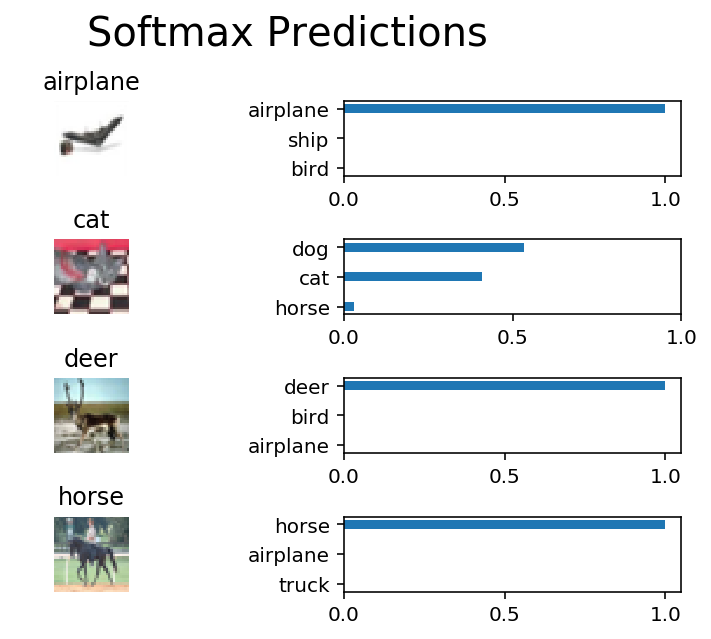

In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.